<a href="https://colab.research.google.com/github/pedromperezc/CEIA/blob/master/ST/clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, date
import numpy as np


# DATOS CLIMATOLOGICOS AUSTRALIA:

Este dataset ha sido extraído del sitio TerraClimate, en el mismo se puede obtener registros de temperatura mensual en la superficie terrestre desde 1958 hasta 2020. 


In [ ]:
weather_data = xr.open_dataset("/content/drive/MyDrive/TIME_SERIES/weather_data.nc")

In [ ]:
weather_data

<xarray.Dataset>
Dimensions:                 (lat: 840, lon: 1080, time: 36)
Coordinates:
  * lat                     (lat) float64 -10.02 -10.06 -10.1 ... -44.94 -44.98
  * lon                     (lon) float64 110.0 110.1 110.1 ... 154.9 155.0
  * time                    (time) datetime64[ns] 2017-01-01 ... 2019-12-01
Data variables: (12/17)
    ppt_station_influence   (time, lat, lon) float32 ...
    vap_station_influence   (time, lat, lon) float32 ...
    tmax_station_influence  (time, lat, lon) float32 ...
    tmin_station_influence  (time, lat, lon) float32 ...
    ws                      (time, lat, lon) float32 ...
    pet                     (time, lat, lon) float32 ...
    ...                      ...
    vap                     (time, lat, lon) float32 ...
    vpd                     (time, lat, lon) float32 ...
    aet                     (time, lat, lon) float32 ...
    srad                    (time, lat, lon) float32 ...
    q                       (time, lat, lon) float64 ...
    pdsi                    (time, lat, lon) float32 ...

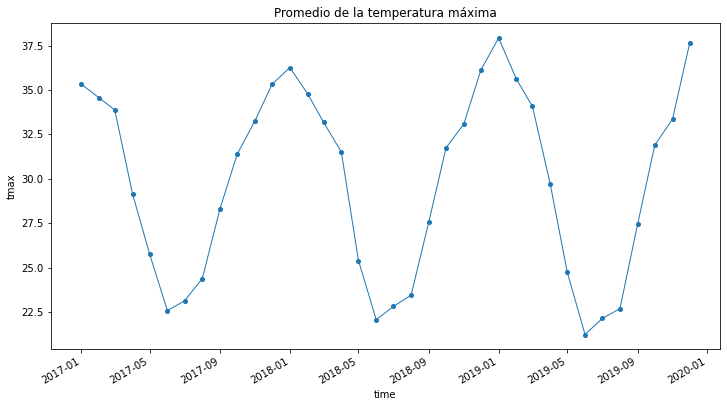

In [ ]:
fig = plt.figure(figsize=(12, 6))
weather_data["tmax"].mean(dim=["lat","lon"]).plot(marker='o',markersize=4,linewidth=1)
plt.title("Promedio de la temperatura máxima")
plt.show()

**Observaciones**:

* Este gráfico muestra la media de temperatura máxima tomada en un periodo mensual desde el año 2017 hasta el 2020 en el continente australiano.
* Del gráfico podemos decir que se observan picos y valles bien marcados.
* La serie cae en sus valles los cuales parecieran que cada vez son más bajos.
* Se observa un leve incremento en los picos.
* Se observa un leve incremento en la variabilidad de las temperatura a medida que pasa el tiempo.
* Como era de esperarse los valores de temperatura son mayores en los meses de verano (de diciembre a marzo) y menores en los meses de invierno (de junio a agosto). Lo lo cual podemos decir que el gráfico muestra un comportamiento de estacionalidad. 

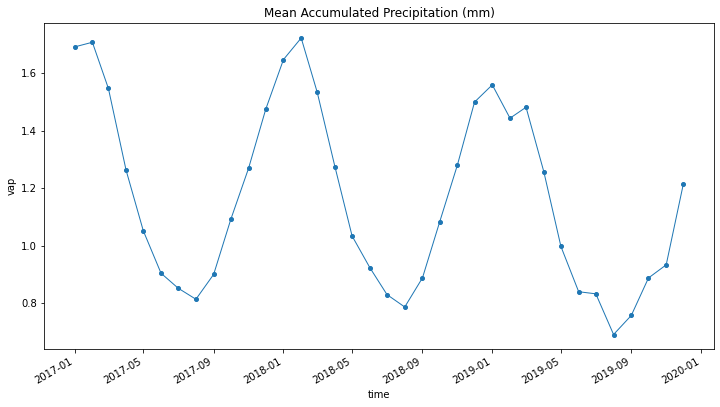

In [ ]:
# Precipitation
precip = (weather_data["vap"]).mean(dim=["lat","lon"])
precip.plot(figsize=(12, 6),marker='o',markersize=4,linewidth=1)
plt.title("Precipitación acumulada en mm")
plt.show()

**Observaciones**:

* Este gráfico muestra la media de temperatura máxima tomada en un periodo mensual desde el año 2017 hasta el 2020 en el continente australiano.
* Del gráfico podemos decir que se observan picos y valles bien marcados.
* La serie cae en sus valles los cuales parecieran que cada vez son más bajos.
* Se observa un leve descensos en los picos mínimos y máximos.
* Se observa un leve descenso en la variabilidad a medida que pasa el tiempo.
* Se observa un efecto de estacionalidad. Aumento en verano (de diciembre a marzo) y descensos en los meses de invierno (de junio a agosto).

# CALIDAD DEL AIRE BUENOS AIRES:

Este dataset ha sido extraído del sitio gobierno de la ciudad de Buenos Aires, en el mismo se puede obtener registros de mediciones de la calidad del aire sobre diferentes puntos de la ciudad. La mediciones hacen referencia a los niveles de CO (monóxido de carbono), NO2 (dióxido de nitrógeno) y PP10 (Partículas menores de 10 micrones por millón).

https://cdn.buenosaires.gob.ar/datosabiertos/datasets/agencia-de-proteccion-ambiental/calidad-aire/calidad-aire.csv

## Preprocesamiento de los datos:

In [ ]:
df_contaminacion = pd.read_csv("/content/drive/MyDrive/TIME_SERIES/calidad-aire.csv")

In [ ]:
df_contaminacion.FECHA = df_contaminacion.FECHA.apply(lambda x: x[:-9])

In [ ]:
df_contaminacion.columns

Index(['FECHA', 'HORA', 'CO_CENTENARIO', 'NO2_CENTENARIO', 'PM10_CENTENARIO',
       'CO_CORDOBA', 'NO2_CORDOBA', 'PM10_CORDOBA', 'CO_LA_BOCA',
       'NO2_LA_BOCA', 'PM10_LA_BOCA', 'CO_PALERMO', 'NO2_PALERMO',
       'PM10_PALERMO'],
      dtype='object')

In [ ]:
df_contaminacion.FECHA = df_contaminacion.FECHA.apply(lambda x: datetime.strptime(x, '%d%b%Y'))

In [ ]:
df_contaminacion.CO_CENTENARIO = df_contaminacion.CO_CENTENARIO.replace('s/d', np.nan )
df_contaminacion.NO2_CENTENARIO = df_contaminacion.NO2_CENTENARIO.replace('s/d', np.nan )
df_contaminacion.PM10_CENTENARIO = df_contaminacion.PM10_CENTENARIO.replace('s/d', np.nan )

In [ ]:
df_contaminacion = df_contaminacion[~df_contaminacion.CO_CENTENARIO.isnull()]
df_contaminacion.CO_CENTENARIO=  df_contaminacion.CO_CENTENARIO.replace(['<0.04', '<0.05', '< 0.05', '#REF!'], '0')
df_contaminacion.CO_CENTENARIO = df_contaminacion.CO_CENTENARIO.astype(float)

df_contaminacion = df_contaminacion[~df_contaminacion.NO2_CENTENARIO.isnull()]
df_contaminacion.NO2_CENTENARIO=  df_contaminacion.NO2_CENTENARIO.replace(['<0.04', '<0.05', '< 0.05', '#REF!'], '0')
df_contaminacion.NO2_CENTENARIO = df_contaminacion.NO2_CENTENARIO.astype(float)

df_contaminacion = df_contaminacion[~df_contaminacion.PM10_CENTENARIO.isnull()]
df_contaminacion.PM10_CENTENARIO=  df_contaminacion.PM10_CENTENARIO.replace(['<0.04', '<0.05', '< 0.05', '#REF!'], '0')
df_contaminacion.PM10_CENTENARIO = df_contaminacion.PM10_CENTENARIO.astype(float)

## NIVEL DE CO_CENTENARIO

In [ ]:
sns.set(rc={"figure.figsize":(20, 8)}) 

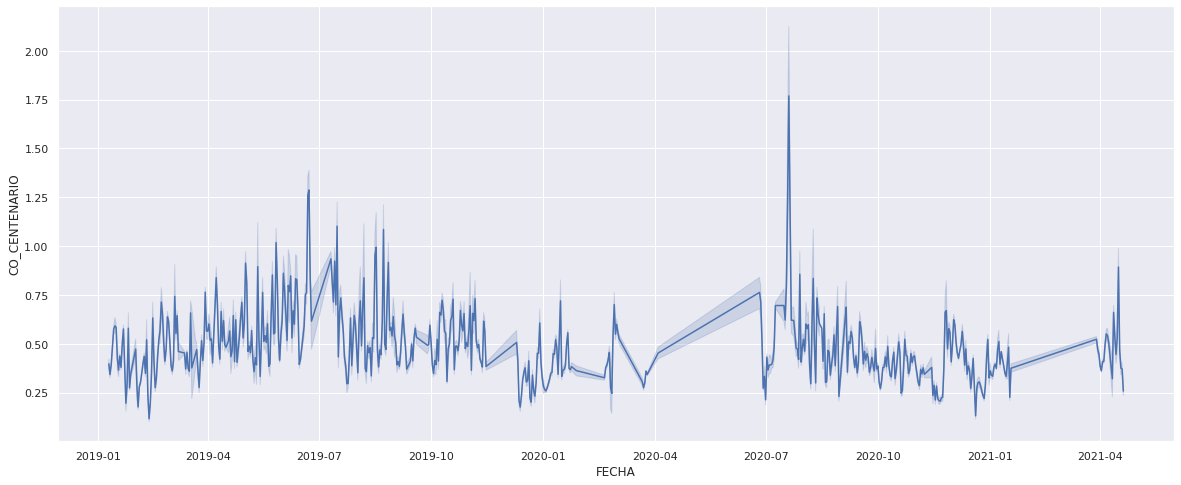

In [ ]:
sns.lineplot(data=df_contaminacion[(df_contaminacion.FECHA > '2019-01-01') & (df_contaminacion.FECHA < '2021-12-31') ], x="FECHA", y="CO_CENTENARIO")

**Observaciones**:

* Este gráfico muestra los niveles de CO tomadas sobre la estación meteorológica del parque centenario entre el 2019 y el 2021.
* Del gráfico podemos decir que se observan picos durante los meses de julio y valles durante los meses de enero.
* Se observa una discontinuidad en la medición durante los meses de marzo a julio del 2020 y durante los meses de enero y marzo del 2021.
